# App Market Analysis (Play Store)


In this notebook, we will do a comprehensive analysis of the Android app market by comparing over ten thousand apps in Google Play across different categories. We'll look for insights in the data to devise strategies to drive growth and retention.

The dataset, which consists of two files:

- apps.csv: contains all the details of the applications on Google Play. There are 13 features that describe a given app.

- user_reviews.csv: contains 100 reviews for each app, most helpful first. The text in each review has been pre-processed and attributed with three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity.

In [23]:
# import Data Cleaning pkgs
import numpy as np
import pandas as pd

apps_df = pd.read_csv('apps.csv')
apps_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [24]:
apps_df.nunique()

App               9659
Category            33
Rating              39
Reviews           5330
Size               461
Installs            21
Type                 2
Price               92
Content Rating       6
Genres             118
Last Updated      1377
Current Ver       2817
Android Ver         33
dtype: int64

 No duplicate apps present in the dataset

In [25]:
print('Total number of apps in the dataset:',apps_df.shape[0])

Total number of apps in the dataset: 9659


## 2. Data Cleaning

The three features that we will be working with are Installs, Size, and Price. The dataset reveals that these columns mandate data cleaning.

Specifically, the presence of special characters (, $ +) and letters (M k) in the Installs, Size, and Price columns make their conversion to a numerical data type difficult. Let's clean by removing these and converting each column to a numeric type.

In [26]:
apps_df['Size'].value_counts()

Varies with device    1227
11M                    182
12M                    181
13M                    177
14M                    177
                      ... 
816k                     1
801k                     1
176k                     1
383k                     1
986k                     1
Name: Size, Length: 461, dtype: int64

In [27]:
apps_df['Size'] = apps_df['Size'].apply(lambda x : str(float(x.replace('k',''))/1000) if 'k' in x else x)

In [28]:
apps_df['Size'].value_counts()

Varies with device    1227
11M                    182
12M                    181
13M                    177
14M                    177
                      ... 
0.116                    1
0.313                    1
0.582                    1
0.028                    1
0.454                    1
Name: Size, Length: 461, dtype: int64

In [29]:
apps_df['Size'] = apps_df['Size'].replace('Varies with device',np.nan)

char_to_remove = ['+',',','M','$']
cols_to_clean = ['Installs','Size','Price']

for col in cols_to_clean:
    # Remove the characters preventing us from converting to numeric
    for char in char_to_remove:
        apps_df[col] = apps_df[col].str.replace(char,'')
        
    # Convert the column to numeric
    apps_df[col] = pd.to_numeric(apps_df[col])

In [30]:
apps_df['Size'].value_counts()

11.000    182
12.000    181
14.000    177
13.000    177
15.000    163
         ... 
0.437       1
0.219       1
0.411       1
0.232       1
0.526       1
Name: Size, Length: 459, dtype: int64

## 3. Android market breakdown

With more than 1 billion active users in 190 countries around the world, Google Play continues to be an important distribution platform to build a global audience. For businesses to get their apps in front of users, it's important to make them more quickly and easily discoverable on Google Play.

To improve the overall search experience, Google has introduced the concept of grouping apps into categories.

This brings us to the following questions:

- Which category has the highest share of (active) apps in the market?
- Is any specific category dominating the market?
- Which categories have the fewest number of apps?

We will see that there are 33 unique app categories present in our dataset. Family and Game apps have the highest market prevalence. Interestingly, Tools, Business and Medical apps are also at the top.

In [38]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

# Print the total number of unique categories
num_categories = len(set(apps_df['Category']))
print('Number of categories:',num_categories)

# Count the number of apps in each 'Category' and sort them for easier plotting
num_apps_in_categories = apps_df['Category'].value_counts().sort_values(ascending=False)

data = [go.Bar(x=num_apps_in_categories.index,y=num_apps_in_categories.values)]
plotly.offline.iplot(data)


Number of categories: 33


## 4. Average rating of apps

Let's see how all these apps perform on an average. App ratings (on a scale of 1 to 5) impact the discoverability, conversion of apps as well as the company's overall brand image. Ratings are a key performance indicator of an app.

In [41]:
# Average rating of apps
avg_app_rating = apps_df['Rating'].mean()
print('Average app rating = ', avg_app_rating)

# Distribution of apps according to their ratings
data = [go.Histogram(
        x = apps_df['Rating'],
        xbins = {'start': 1, 'size': 0.1, 'end' : 5}
)]

# Vertical dashed line to indicate the average app rating
layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
          }

plotly.offline.iplot({'data': data, 'layout': layout})

Average app rating =  4.173243045387998


## 5. Sizing and pricing strategy

Let's now examine app sizes and app prices. For size, if the mobile app is too large, it may be difficult and/or expensive for users to download. Lengthy download times could turn users off before they even experience your mobile app. Plus, each user's device has a finite amount of disk space.

For price, some users expect their apps to be free or inexpensive. These problems compound if the developing world is part of your target market; especially due to internet speeds, earning power and exchange rates.

How can we effectively come up with strategies to size and price our app?

- Does the size of an app affect its rating?
- Do users really care about system-heavy apps or do they prefer light-weighted apps?
- Does the price of an app affect its rating?
- Do users always prefer free apps over paid apps?

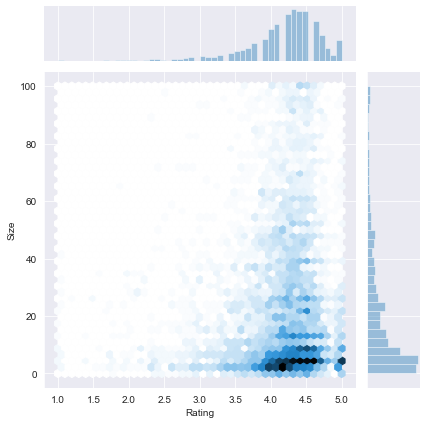

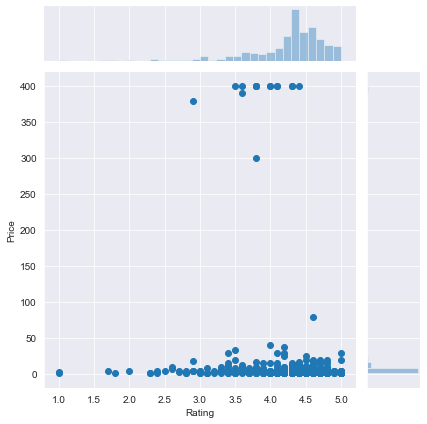

In [44]:
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

# Subset for categories with at least 250 apps
large_categories = apps_df.groupby('Category').filter(lambda x: len(x) >= 250).reset_index()

# Plot size vs. rating
sns.jointplot(x = "Rating", y = "Size", data = large_categories, kind = 'hex')

# Subset for paid apps only
paid_apps = apps_df[apps_df['Type'] == 'Paid']

# Plot price vs. rating
sns.jointplot(x = 'Rating', y = 'Price', data = paid_apps)


## 6. Pricing of app?

How are companies and developers supposed to make ends meet? What monetization strategies can companies use to maximize profit? The costs of apps are largely based on features, complexity, and platform.

There are many factors to consider when selecting the right pricing strategy for your mobile app. It is important to consider the willingness of your customer to pay for your app. A wrong price could break the deal before the download even happens. 

Potential customers could be turned off by what they perceive to be a shocking cost, or they might delete an app they’ve downloaded after receiving too many ads or simply not getting their money's worth.

Needless to say, different categories demand different price ranges. Some apps that are simple and used daily, like the calculator app, should probably be kept free whereas it would make sense to charge a price from the customers for a specialized medical app that diagnoses diabetic patients.

,Category,App,Price
4197,FAMILY,most expensive app (H),399.99
4362,LIFESTYLE,💎 I'm rich,399.99
4367,LIFESTYLE,I'm Rich - Trump Edition,400.00
5351,LIFESTYLE,I am rich,399.99
5354,FAMILY,I am Rich Plus,399.99
5355,LIFESTYLE,I am rich VIP,299.99
5356,FINANCE,I Am Rich Premium,399.99
5357,LIFESTYLE,I am extremely Rich,379.99
5358,FINANCE,I am Rich!,399.99
5359,FINANCE,I am rich(premium),399.99


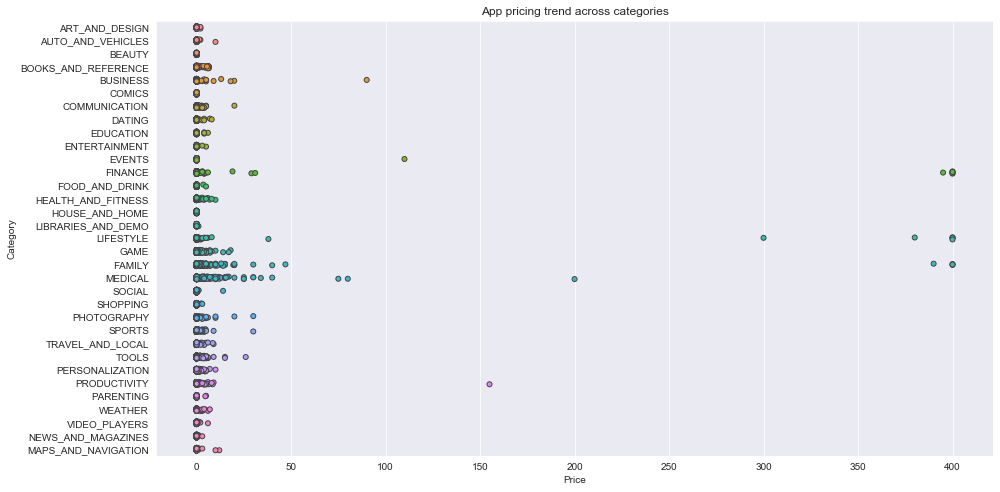

In [46]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Select a few popular app categories
popular_app_cats = apps_df[apps_df.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Examine the price trend for the subset of categories
ax = sns.stripplot(x='Price', y='Category', data=apps_df,
                   jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

# Category, Name and Price of apps priced above $200
apps_above_200 = popular_app_cats[popular_app_cats['Price'] > 200][['Category', 'App', 'Price']]
apps_above_200

## 7. Filtering out useless apps

It looks like a bunch of the really expensive apps are useless apps. That is, apps that don't really have a purpose. Some app developer may create an app called I Am Rich Premium or most expensive app just for a joke or to test their app development skills.

Some developers even do this with malicious intent and try to make money by hoping people accidentally click purchase on their app in the store.

Let's filter out these useless apps and re-do our visualization. 

Text(0.5, 1.0, 'App pricing trend across categories after filtering for junk apps')

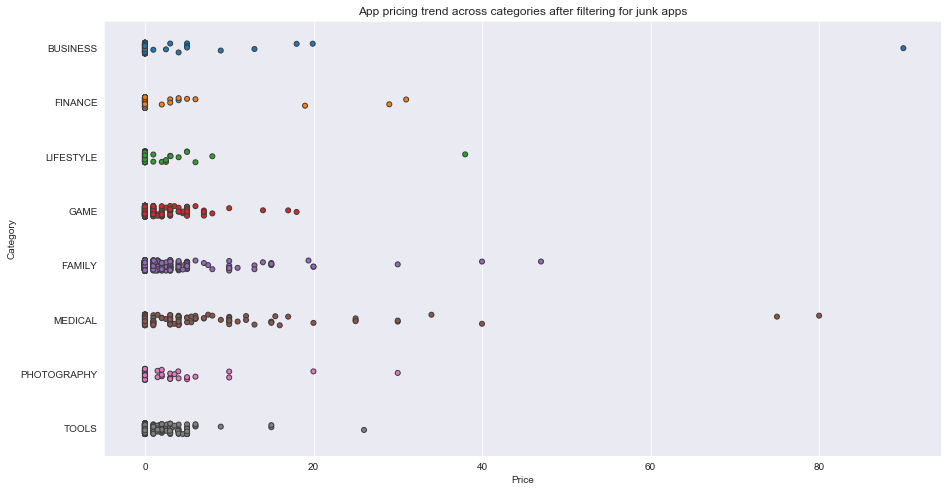

In [47]:
# Select apps priced below $100
apps_under_100 = popular_app_cats[popular_app_cats['Price'] < 100]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Examine price vs category with the authentic apps
ax = sns.stripplot(x='Price', y='Category', data=apps_under_100,
                   jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories after filtering for junk apps')

## 8. Number of installs for paid apps vs. free apps

For apps in the Play Store today, there are five types of pricing strategies: free, freemium, paid, paymium, and subscription. Let's focus on free and paid apps only. Some characteristics of free apps are:

- Free to download.
- Main source of income often comes from advertisements.
- Often created by companies that have other products and the app serves as an extension of those products.
- Can serve as a tool for customer retention, communication, and customer service.

Some characteristics of paid apps are:

- Users are asked to pay once for the app to download and use it.
- The user can't really get a feel for the app before buying it.

Are paid apps are installed as much as free apps?

In [49]:
trace0 = go.Box(
    # Data for paid apps
    y=apps_df[apps_df['Type'] == 'Paid']['Installs'],
    name = 'Paid'
)

trace1 = go.Box(
    # Data for free apps
    y=apps_df[apps_df['Type'] == 'Free']['Installs'],
    name = 'Free'
)

layout = go.Layout(
    title = "Number of downloads of paid apps vs. free apps",
    yaxis = dict(
        type = 'log',
        autorange = True
    )
)

# Add trace0 and trace1 to a list for plotting
data = [trace0, trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

## 9. Sentiment analysis of user reviews

Mining user review data to determine how people feel about your product, brand, or service can be done using a technique called sentiment analysis. User reviews for apps can be analyzed to identify if the mood is positive, negative or neutral about that app. For example, positive words in an app review might include words such as 'amazing', 'friendly', 'good', 'great', and 'love'. Negative words might be words like 'malware', 'hate', 'problem', 'refund', and 'incompetent'.

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

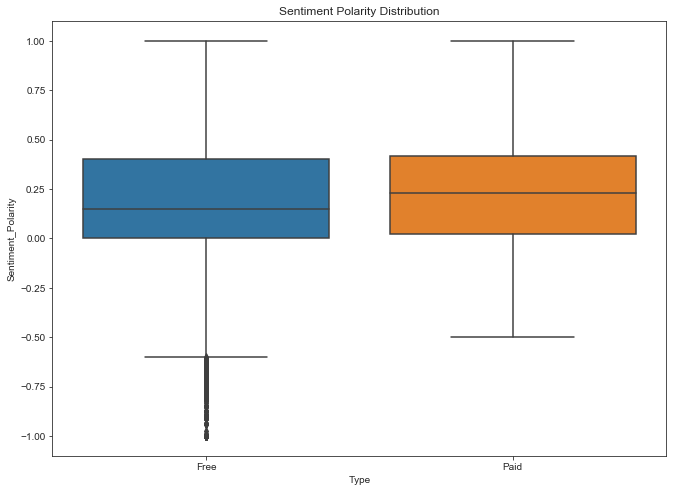

In [50]:
# Read in the user reviews
reviews_df = pd.read_csv("user_reviews.csv")

# Join and merge the two dataframe
merge_df = pd.merge(apps_df, reviews_df, on = 'App', how = "inner")

# Drop NA values from Sentiment and Translated_Review columns
merge_df = merge_df.dropna(subset=['Sentiment', 'Translated_Review'])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', data = merge_df)
ax.set_title('Sentiment Polarity Distribution')

By plotting sentiment polarity scores of user reviews for paid and free apps, we observe that free apps receive a lot of harsh comments, as indicated by the outliers on the negative y-axis. 

Reviews for paid apps appear never to be extremely negative. This may indicate something about app quality, i.e., paid apps being of higher quality than free apps on average. 

The median polarity score for paid apps is a little higher than free apps.